# <center> Keyness Analysis </center>


<center> <img src="images/twitter_picture.jpg" width="600" height="400"> </center>

* Below I will be conducting keyness analysis on some of the pandemic-related words I am highlighting in my research

* After tokenizing my corpora, I will be running keyness analysis for the specific mask, vaccine, and economy-related words

* For the one word list, I decided to take out stop words so that the list highlights the content words 

* Next, I will look at the one-word, bigram, and trigram lists to get a better sense of what is prominent in one corpora versus the other

* These are the hypotheses I hope to explore in this notebook:

* **Hypothesis #1**: *conservatives are more likely to discuss economic issues regarding the pandemic than Liberals.*

* **Hypothesis #2**: *liberals are more likely to discuss masks, and vaccines than conservatives.*


In [1]:
## run the functions notebook
%run functions.ipynb

In [2]:
## import the packages
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
import warnings
warnings.filterwarnings("ignore")

In [3]:
## read in the data
con_data=pd.read_csv("/Commjhub/jupyterhub/comm318_fall2019/joellegross/comm313_S21/comm313_S21_Final_Project/data/con_final_data.csv")
lib_data=pd.read_csv("/Commjhub/jupyterhub/comm318_fall2019/joellegross/comm313_S21/comm313_S21_Final_Project/data/liberal_data_final.csv")

In [4]:
## create a list of stop words
stop_words = set(stopwords.words('english')) 

In [5]:
## tokenize the conservative data
con_tokens=[]
for i in range(0,con_data.shape[0]):
    tokens=tokenize(con_data.loc[i, "text"])
    con_tokens.append(tokens)
con_data["tokens"]=con_tokens

In [38]:
## tokenize the liberal data
lib_tokens=[]
for i in range(0,lib_data.shape[0]):
    tokens=tokenize(lib_data.loc[i, "text"])
    lib_tokens.append(tokens)
lib_data["tokens"]=lib_tokens

In [39]:
## create bigram, trigram, one-gram frequency lists
con_list = [ item for elem in con_tokens for item in elem]
lib_list = [ item for elem in lib_tokens for item in elem]

In [40]:
## create filtered lists for each corpora to make the one-word lists
filtered_con_list = [word for word in con_list if word not in stopwords.words('english')]
filtered_lib_list = [word for word in lib_list if word not in stopwords.words('english')]

In [41]:
## create counter objects for the one-word, bigram, and trigram lists
con_word_dist = Counter(filtered_con_list)
con_bigram_dist = Counter(get_ngram_tokens(con_list, 2))
con_trigram_dist = Counter(get_ngram_tokens(con_list, 3))

In [42]:
## create counter objects for the one-word, bigram, and trigram lists
lib_word_dist = Counter(filtered_lib_list)
lib_bigram_dist = Counter(get_ngram_tokens(lib_list, 2))
lib_trigram_dist = Counter(get_ngram_tokens(lib_list, 3))

In [43]:
## get the size of the tokens list
lib_size = len(lib_list)
lib_size_flitered = len(filtered_lib_list)
con_size = len(con_list)
con_size_filtered = len(filtered_con_list)

## <center> Log Likelihood Analysis </center>

* To understand if log likelihood is a significant value, we are looking for a log likelihood in the 95th percentile; 5% level; p < 0.05;  or of a critical value above or equal to 3.84

### <center> Log Likelihood Analysis: Mask-Related Words <center/>

In [44]:
## mask-word log likelihood output
mask_words=["mask", "maskless","mandate"]

mask_log_likelihoods=[]
for mask_word in mask_words:
    print("log likelihood for", mask_word, "is:", log_likelihood(lib_word_dist.get(mask_word), lib_size_flitered,
                   con_word_dist.get(mask_word), lib_size_flitered
                  ))
    mask_log_likelihoods.append(log_likelihood(lib_word_dist.get(mask_word), lib_size_flitered,
                   con_word_dist.get(mask_word), con_size_filtered))

log likelihood for mask is: 1.8068114926658971
log likelihood for maskless is: 0.0
log likelihood for mandate is: -1.8280216610125137


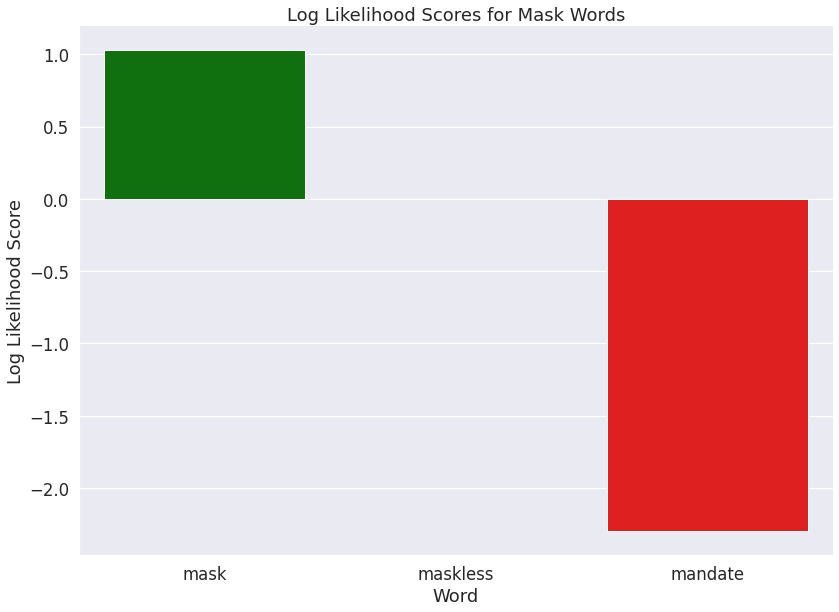

In [45]:
## mask-words log likelihood graph
sns.set(font_scale = 1.5)
mask_graph_df= pd.DataFrame()
mask_graph_df["word"]=mask_words
mask_graph_df["ll"]=mask_log_likelihoods
sns.catplot(x="word", y="ll", data=mask_graph_df, kind="bar", palette=['green', 'blue', "red"],height=8.27, aspect=11.7/8.27)
plt.xlabel("Word")
plt.ylabel("Log Likelihood Score")
plt.title("Log Likelihood Scores for Mask Words")
plt.show();


### <center> Observations from Log Likelihood: Mask-Related Words <center/>
    
* The log likelihood values for the mask-related words are not in the target area of interest, above 3.84, which indicates that these words are not specific to any of the corpora.

* Ultimately, mask-related discussion may not be a greater indicator of liberal or conservative conversation

### <center> Log Likelihood Analysis: Vaccine-Related Words <center/>

In [50]:
## mask-word log likelihood output
vax_words=["vaccine", "Pfizer", "Moderna", "dose"]
vax_log_likelihoods=[]

for vax_word in vax_words:
    print("log likelihood for", vax_word, "is:", log_likelihood(lib_word_dist.get(vax_word), lib_size,
                   con_word_dist.get(vax_word), con_size
                  ))
    vax_log_likelihoods.append(log_likelihood(lib_word_dist.get(vax_word), lib_size,
                   con_word_dist.get(vax_word), con_size))

log likelihood for vaccine is: 59.11107783015022
log likelihood for Pfizer is: 0.025206941313207776
log likelihood for Moderna is: -0.013640161528281403
log likelihood for dose is: -0.02046024229242155


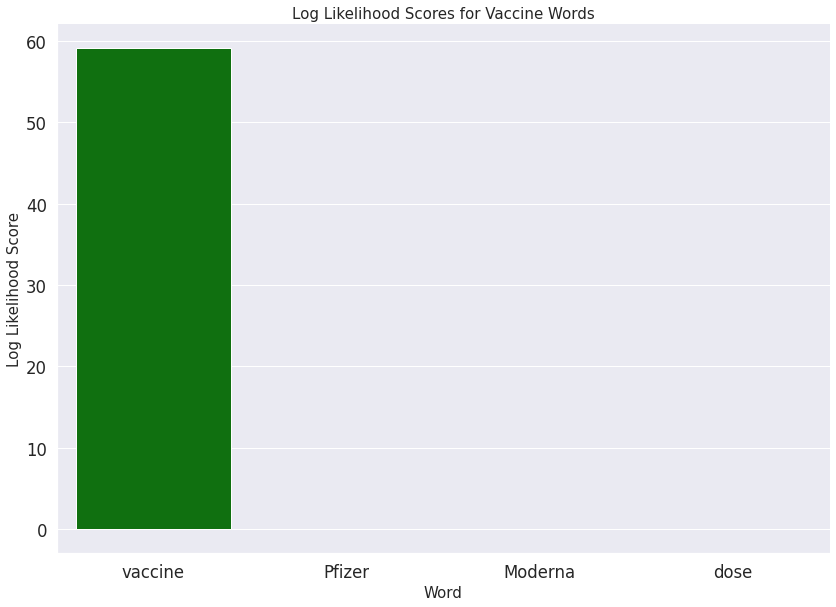

In [51]:
## vaccine-word log likelihood output
vax_graph_df= pd.DataFrame()
vax_graph_df["word"]=vax_words
vax_graph_df["ll"]=vax_log_likelihoods
sns.catplot(x="word", y="ll", data=vax_graph_df, kind="bar", palette=['green', 'blue', "red"],height=8.27, aspect=11.7/8.27)

plt.xlabel("Word", fontsize=15)
plt.ylabel("Log Likelihood Score", fontsize=15)
plt.title("Log Likelihood Scores for Vaccine Words", fontsize=15)
plt.show();

### <center> Observations from Log Likelihood: Vaccine-Related Words <center/>
    
* The log likelihood values for vaccine-related words are more revealing than the mask-related words.
    
* We are getting a high log likelihood value for the word "vaccine"

* "Vaccine" has a much higher log likelihood score than all other words. In fact it has a log likelihood of almost 60, indicating it is way more prevalent in the liberal corpus.
    
* The other words, such as pfizer, moderna do not appear in either corpus. Given that the names of the vaccine companies were relevant later on in the course of the pandemic there just might not be enough data to understand these words in my corpora.

### <center> Log Likelihood Analysis: Economy-Related Words <center/>

In [52]:
## econ-word log likelihood
econ_log_likelihoods=[]
econ_words=["jobs", "unemployment","lockdown", "restaurant", "closure", "economy", "recession"]
for econ_word in econ_words:
    print("log likelihood for", econ_word, "is:", log_likelihood(lib_word_dist.get(econ_word), lib_size,
                   con_word_dist.get(econ_word), con_size
                  ))
    econ_log_likelihoods.append(log_likelihood(lib_word_dist.get(econ_word), lib_size,
                   con_word_dist.get(econ_word), con_size))

log likelihood for jobs is: 3.731262420550175
log likelihood for unemployment is: 14.569895790105443
log likelihood for lockdown is: 15.703269380890607
log likelihood for restaurant is: -1.3409185234794379
log likelihood for closure is: -0.013640161528281403
log likelihood for economy is: 3.169452447618511
log likelihood for recession is: 0.10158104396462098


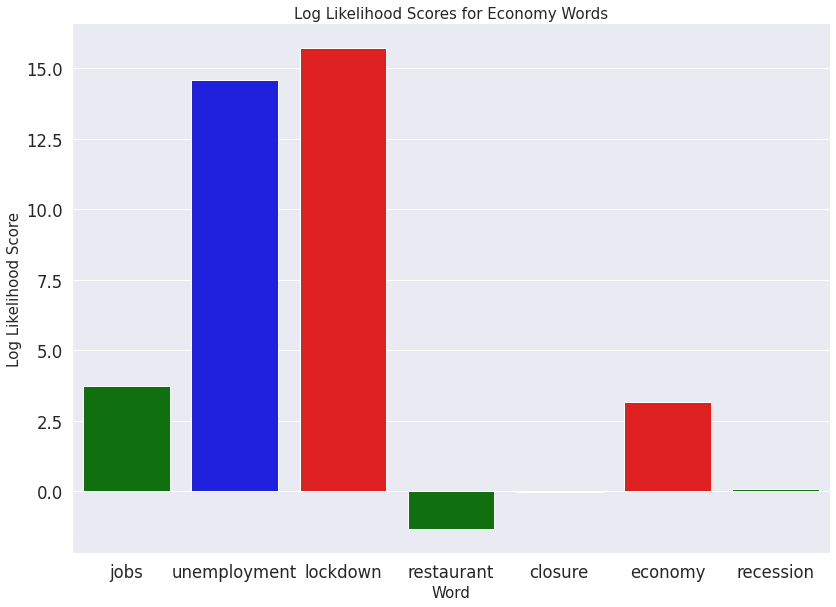

In [53]:

econ_graph_df= pd.DataFrame()
econ_graph_df["word"]=econ_words
econ_graph_df["ll"]=econ_log_likelihoods
sns.catplot(x="word", y="ll", data=econ_graph_df, kind="bar", palette=['green', 'blue', "red"],height=8.27, aspect=11.7/8.27)
plt.xlabel("Word", fontsize=15)
plt.ylabel("Log Likelihood Score", fontsize=15)
plt.title("Log Likelihood Scores for Economy Words", fontsize=15)
plt.show();



### <center> Observations from Log Likelihood: Economy-Related Words <center/>
    
* The log likelihood values for the economy-related words are the most revealing of the three different word subsets.
    
* There is a high log likelihood value for the word "unemployment", "jobs, "lockdown", and "economy"

* This finding indicates that one of my initial hypotheses is wrong, *conservatives are more likely to discuss economic issues regarding the pandemic than liberals.*
    
* Ultimately, liberals are more likely than conservatives to use these words in their tweets.

## <center> One-Word Lists, Bigram, Trigram Comparisons Across Corpora </center>

### <center> One-Word Lists, Liberals as Corpus A <center/>

In [18]:
## getting the top 50-150 words (exlcuding the first 50)
top_lib = lib_word_dist.most_common()[50:150]
top_con = con_word_dist.most_common()[50:150]

In [54]:
## one-word lists with Liberal Corpus as Corpus A
item_list=[]
freq_list=[]
ref_freq_list = []
keyness_list=[]
calculate_keyness2(lib_word_dist, con_word_dist, top=50)

WORD                     Corpus A Freq.Corpus B Freq.Keyness
coronavirus              547       101       305.324
|                        221       32        144.977
Covid-19                 150       11        132.848
pandemic                 209       35        125.052
says                     400       142       109.559
health                   176       32        99.368
Trump                    1093      642       87.559
new                      368       156       73.292
first                    218       71        67.891
cases                    124       24        66.768
writes                   78        7         64.330
vaccine                  113       21        62.770
Trump's                  189       59        62.379
workers                  111       21        60.830
U.S.                     243       93        58.736
Trump’s                  173       54        57.106
US                       197       71        52.674
spread                   70        8         52.05

In [56]:
## creating a dataframe of the values for the graph
keyness_one1 =pd.DataFrame()
keyness_one1["item"]=item_list
keyness_one1["freq"]=freq_list
keyness_one1["ref_freq"]=ref_freq_list
keyness_one1=keyness_one1[:15]
keyness_one2 =pd.DataFrame()
keyness_one2["item"]=item_list
keyness_one2["keyness"]=keyness_list
keyness_one15=keyness_one2[:15]
keyness_one30=keyness_one2[15:30]

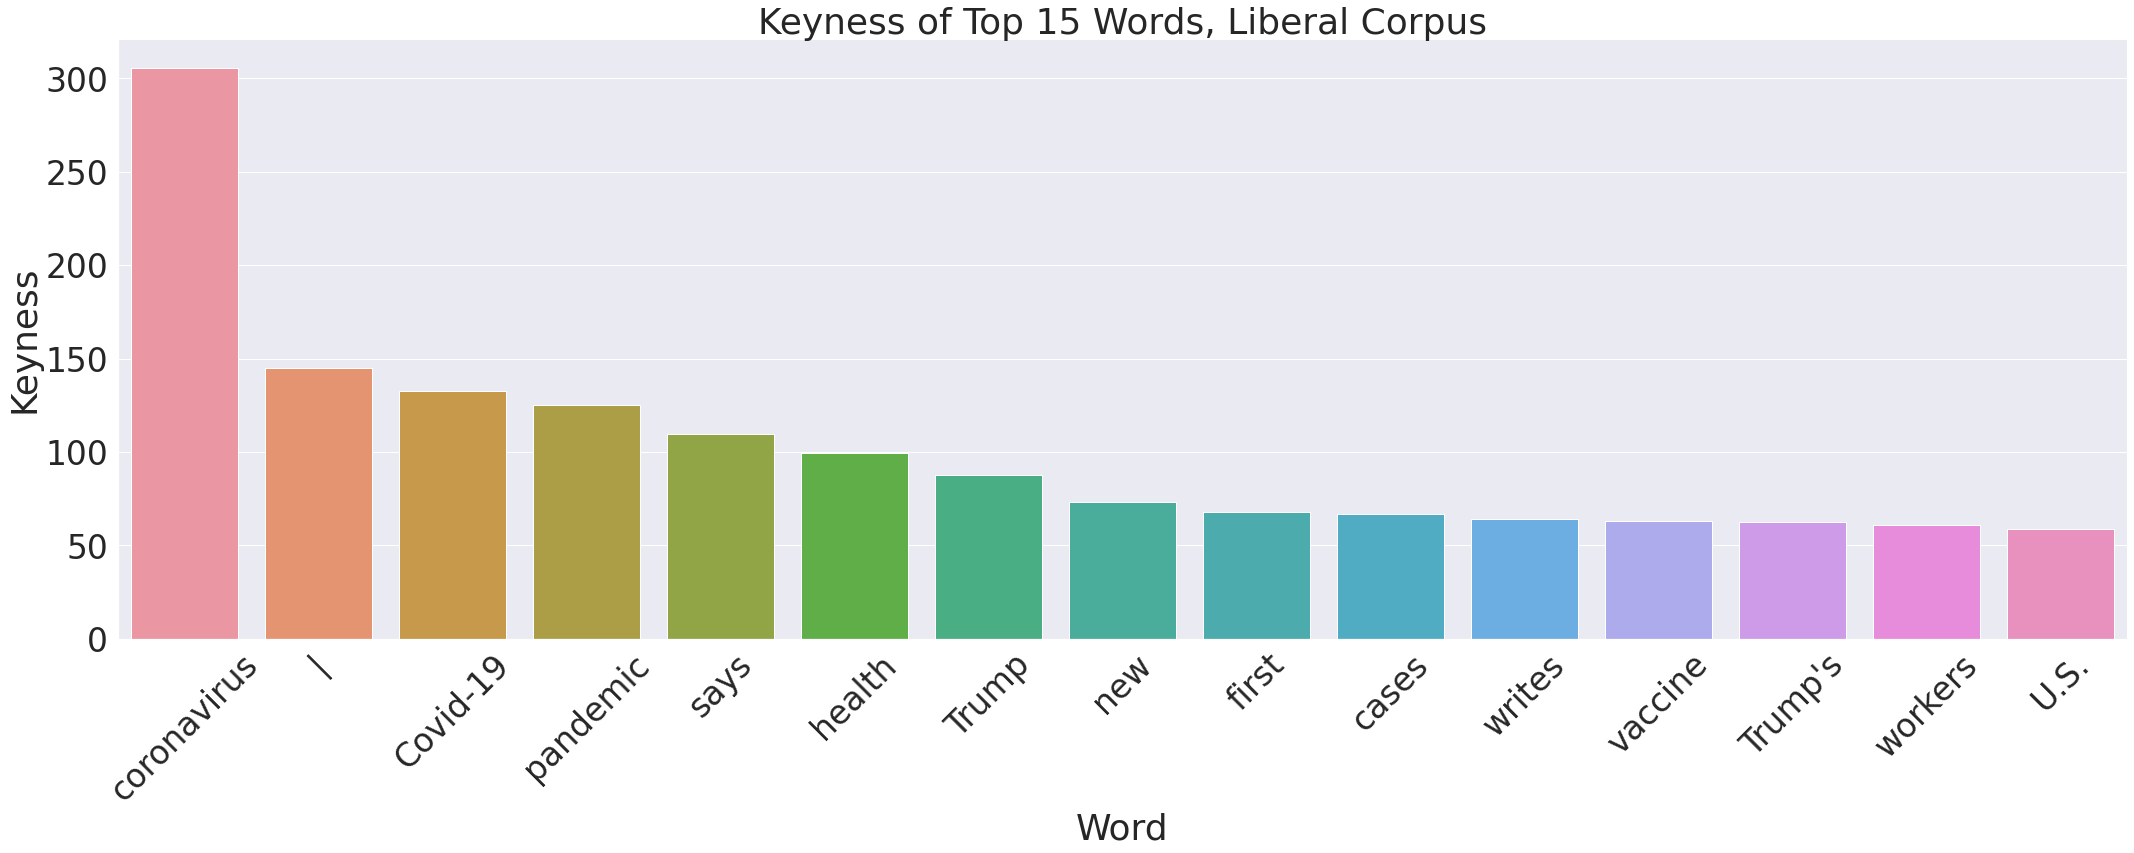

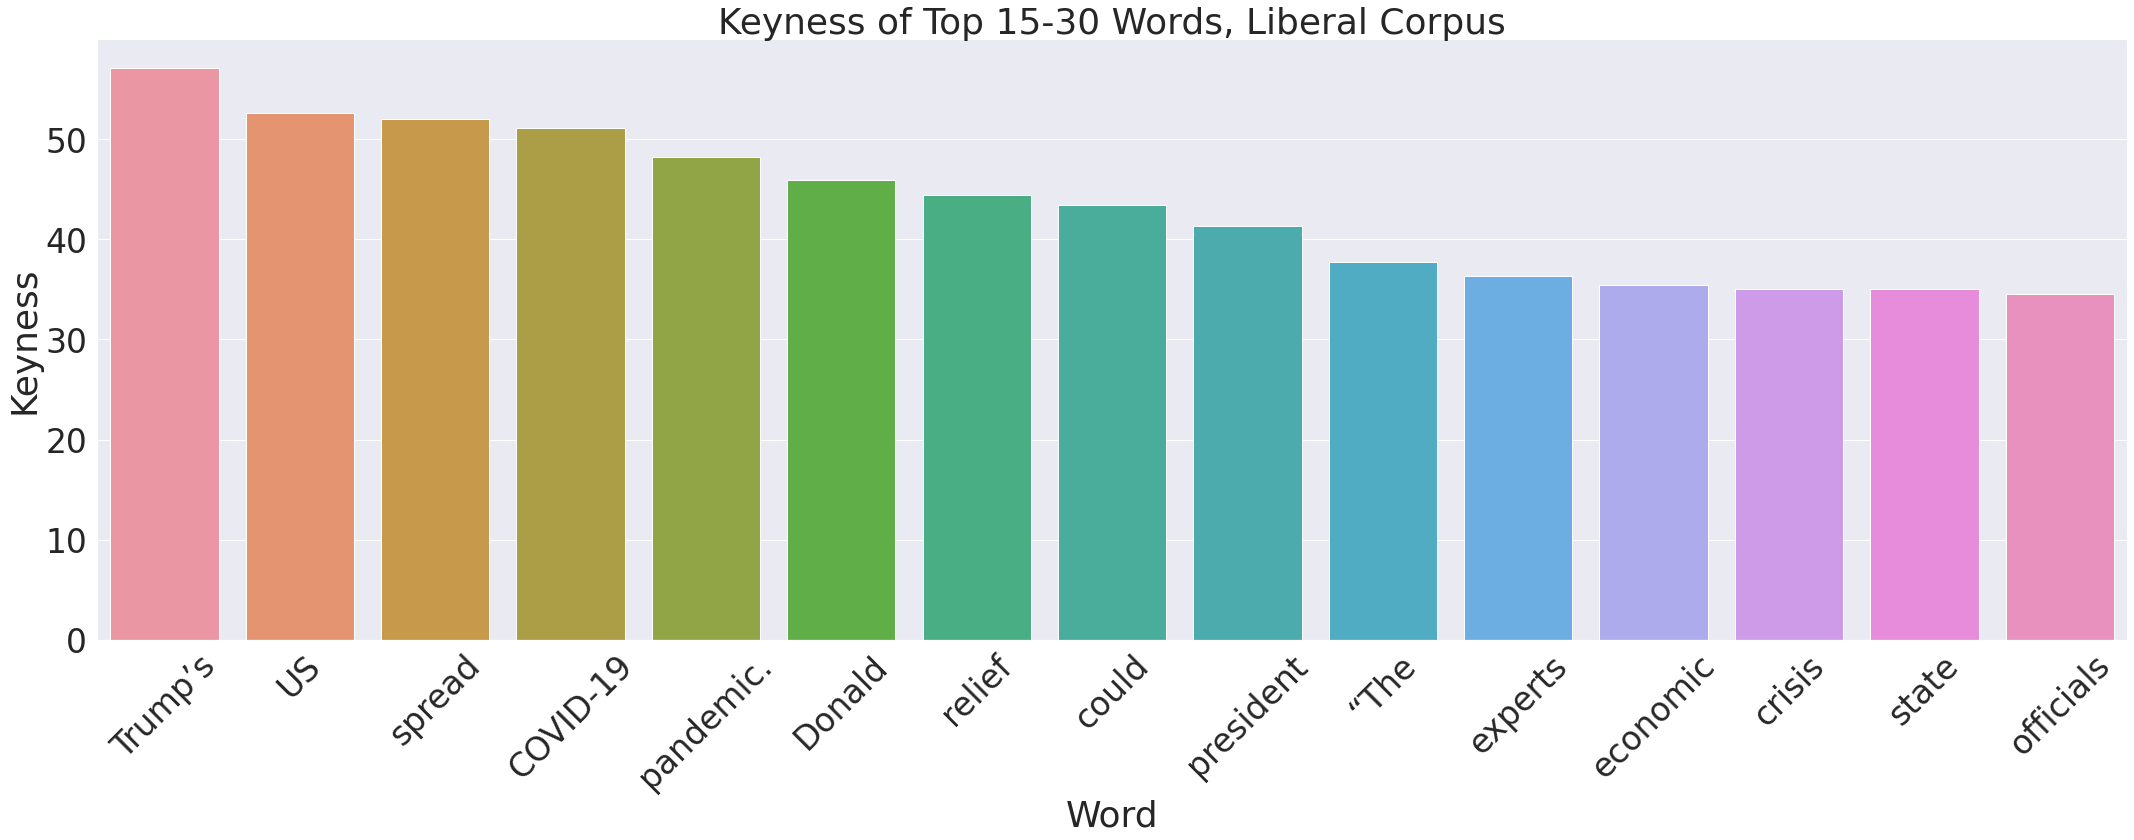

In [57]:
## graphing the values, so we can visualize the results from the table
sns.set(font_scale = 3)
ax=sns.catplot(x="item", y="keyness", data=keyness_one15, kind="bar", height=10, aspect=3)
plt.title("Keyness of Top 15 Words, Liberal Corpus")
plt.xlabel("Word")
plt.ylabel("Keyness")
plt.xticks(rotation=45)
plt.show();

sns.set(font_scale = 3)
ax=sns.catplot(x="item", y="keyness", data=keyness_one30, kind="bar", height=10, aspect=3)
plt.title("Keyness of Top 15-30 Words, Liberal Corpus")
plt.xlabel("Word")
plt.ylabel("Keyness")
plt.xticks(rotation=45)
plt.show();


In [58]:
##creating dataframes to compare raw frequencies
keyness_one1 = pd.melt(keyness_one1, id_vars="item", var_name="Corpus", value_name="Frequency")
keyness_one1=keyness_one1.replace('ref_freq', 'Conservative', regex=True)
keyness_one1=keyness_one1.replace('freq', 'Liberal', regex=True)

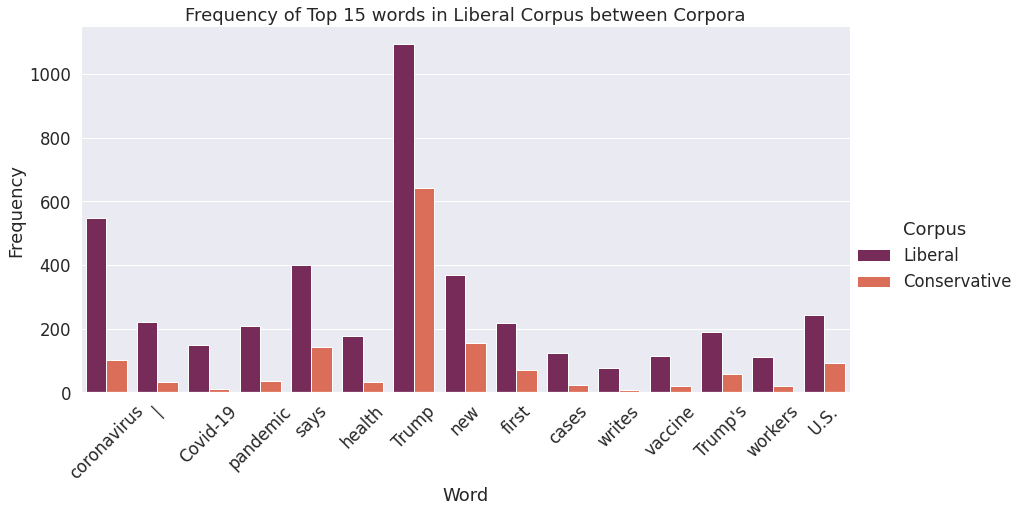

In [59]:
## graphing the raw frequencies of the top 30 words for Liberal Corpus between Corpora
sns.set(font_scale = 1.5)
sns.color_palette("rocket", as_cmap=True)
sns.catplot(x="item", y="Frequency", hue="Corpus", data= keyness_one1, kind="bar", height=6, aspect=2, palette="rocket")
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.title("Frequency of Top 15 words in Liberal Corpus between Corpora")
plt.show();

### <center> Observations: One-Word Lists, Liberals as Corpus A <center/>

* Over the past year, Liberals are far more likely to discuss words such as "coronavirus", "COVID-19", "pandemic", and "health" than Conservatives

* It is interesting to see words such as "experts","economic", "crisis", "spread" also appear
    
* Possibly, this finding could indicate that liberals are more likely to believe experts when discussing social distancing or the vaccine efficacy

* The focus on the word "cases" could indicate liberal sensitivity to the fact that cases are  rising or falling more than conservatives
    
* Ultimately, these words are precisely the pandemic-related words I would have assumed to see in the liberal corpus.

### <center> One-Word Lists, Conservatives as Corpus A <center/>

In [60]:
## one-word lists with Conservative Corpus as Corpus A
item_list=[]
freq_list=[]
ref_freq_list = []
keyness_list=[]
calculate_keyness2(con_word_dist, lib_word_dist, top=50)

WORD                     Corpus A Freq.Corpus B Freq.Keyness
I                        1054      582       175.344
@realDonaldTrump         174       28        128.540
--                       174       46        89.160
Democrat                 102       14        82.044
Media                    76        5         80.126
via                      263       112       74.264
&amp;                    439       246       70.360
To                       315       159       64.519
-                        487       297       61.659
Thanks                   97        23        54.731
Says                     105       28        53.366
They                     187       80        52.402
.                        60        7         52.035
You                      254       130       50.482
Good                     68        11        50.083
media                    162       69        45.732
Not                      133       51        44.188
Cuomo                    74        17        42.855
J

In [61]:
## creating a dataframe of the values for the graph
keyness_two1 =pd.DataFrame()
keyness_two1["item"]=item_list
keyness_two1["freq"]=freq_list
keyness_two1["ref_freq"]=ref_freq_list
keyness_two1=keyness_two1[15:30]
keyness_two2 =pd.DataFrame()
keyness_two2["item"]=item_list
keyness_two2["keyness"]=keyness_list

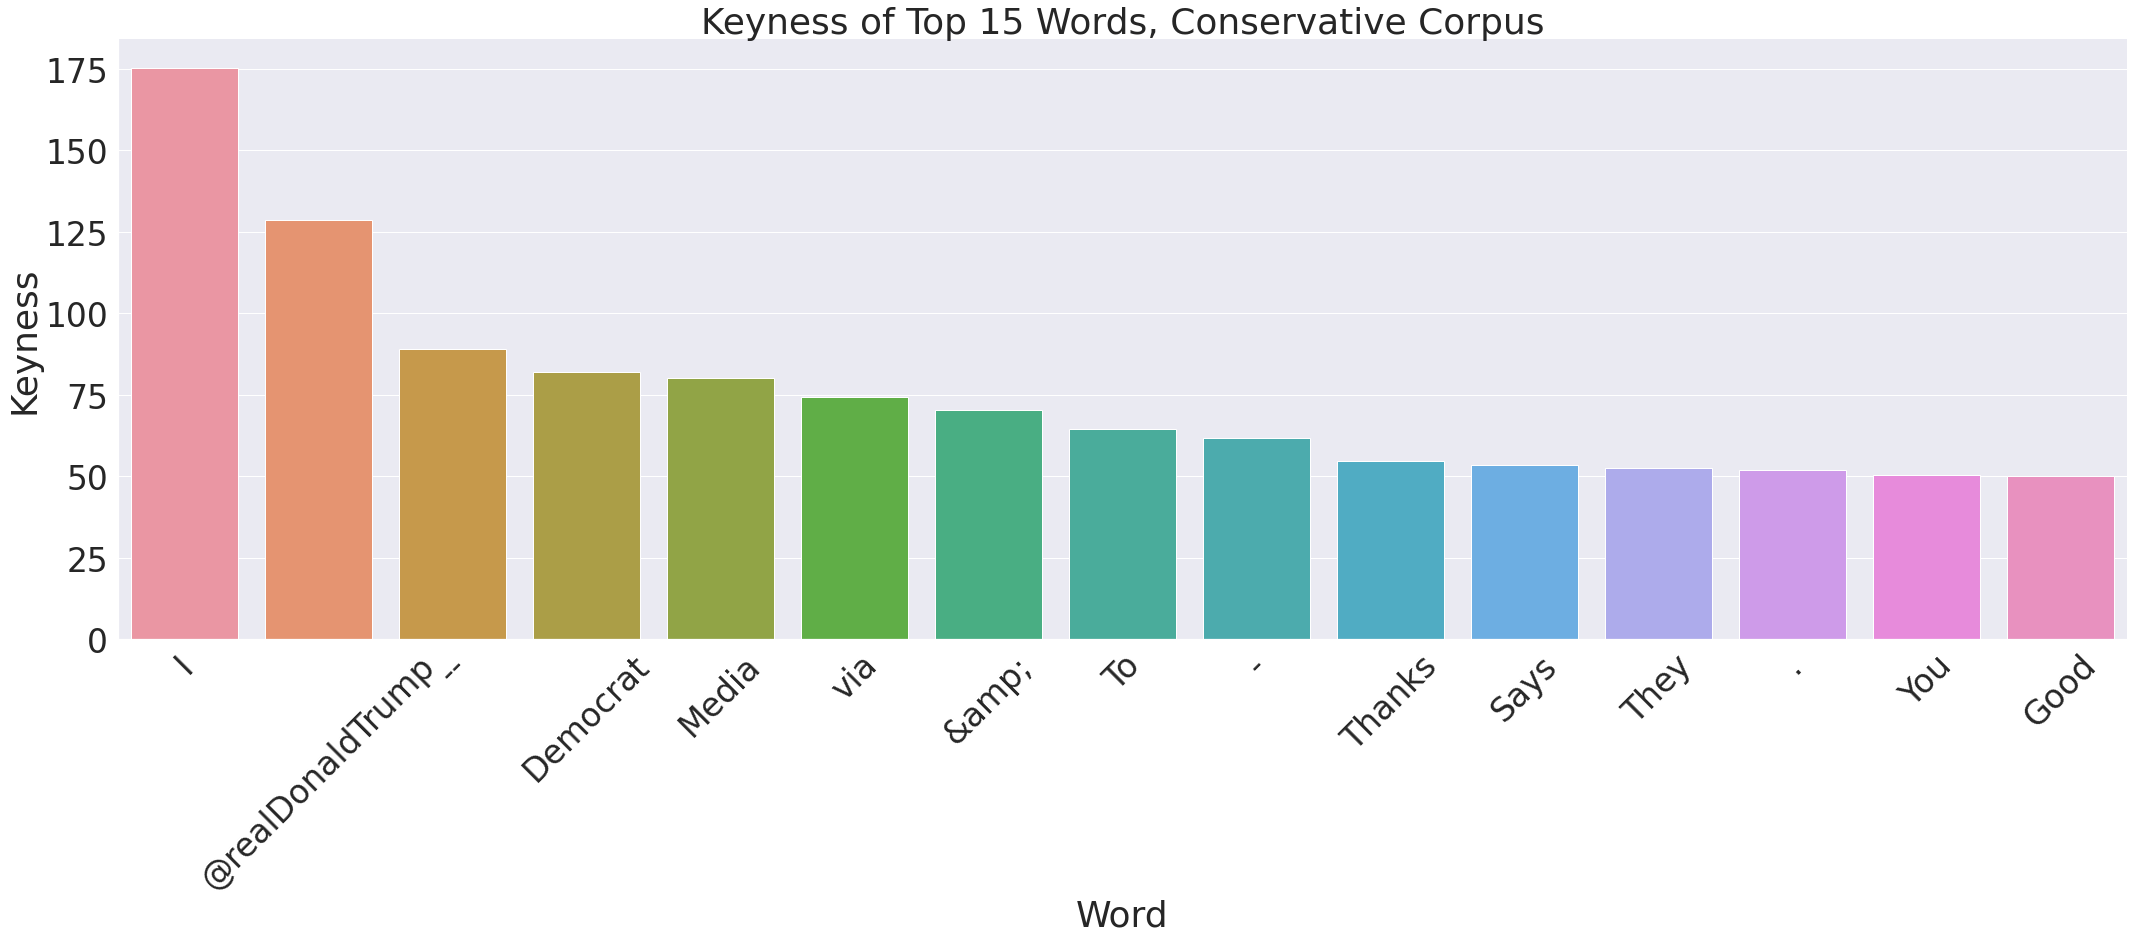

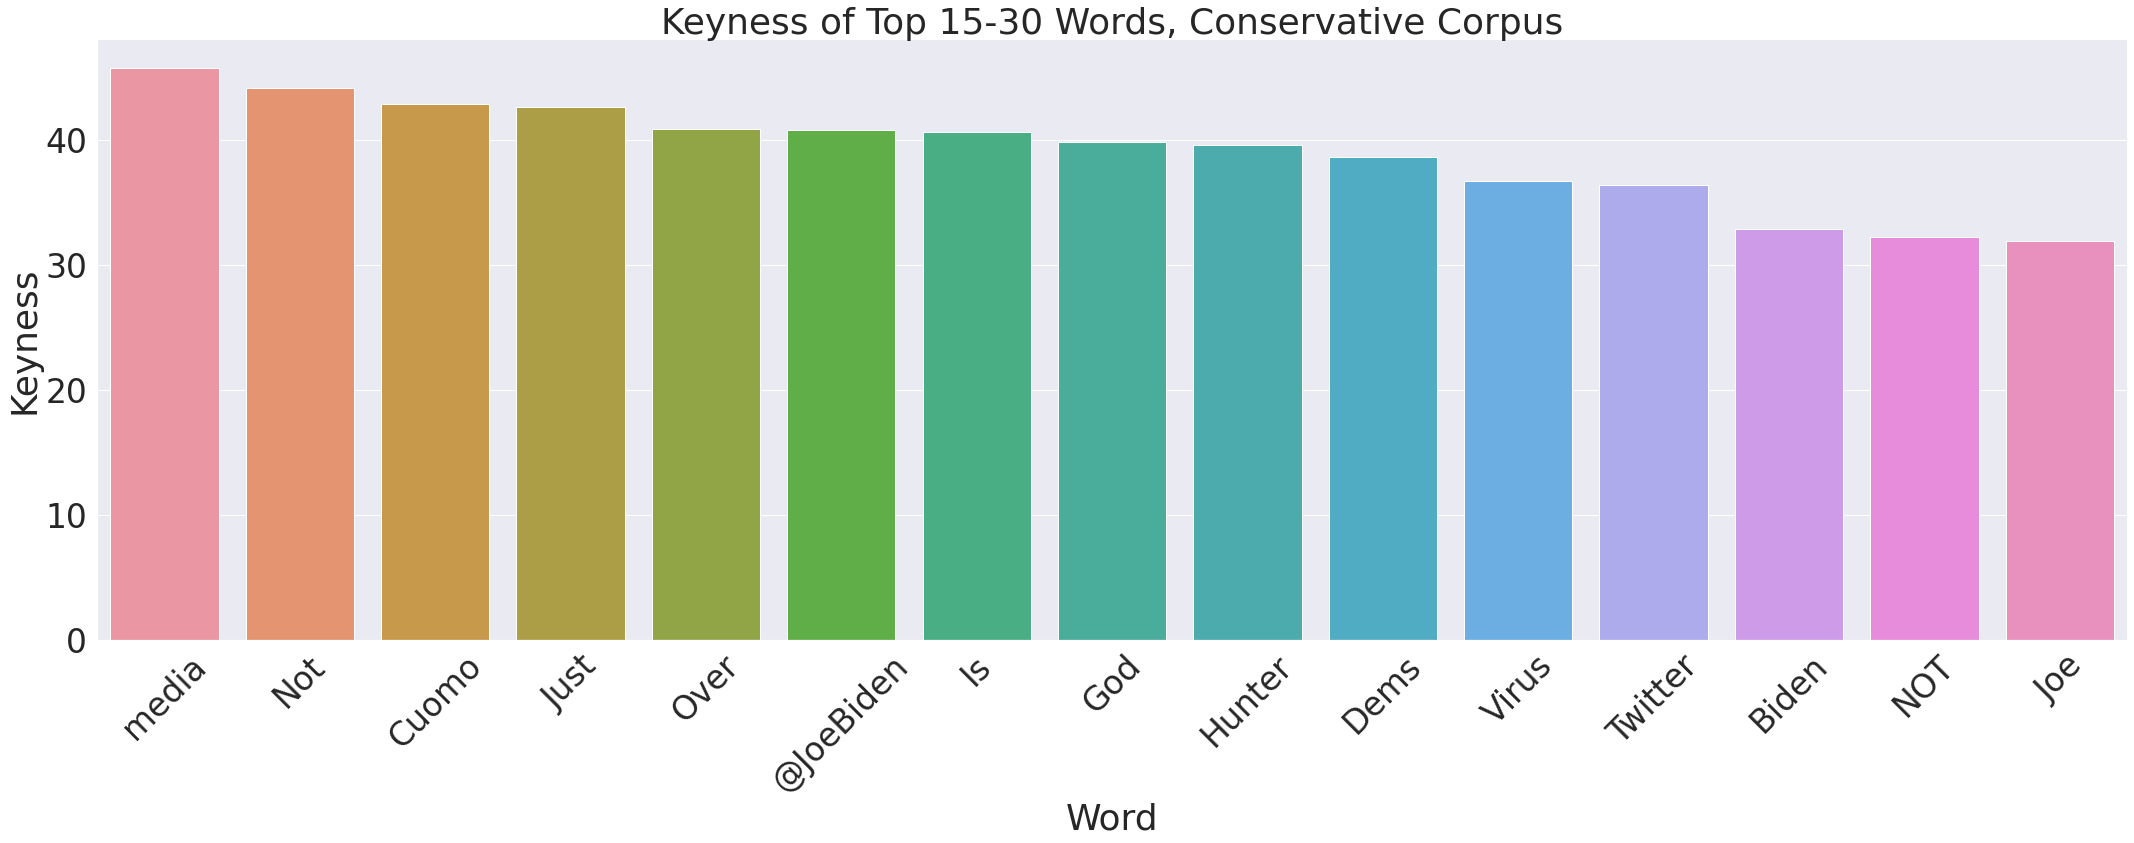

In [62]:
## graphing the raw frequencies of the Top 30 words for Conservative Corpus between Corpora
sns.set(font_scale = 3)
ax=sns.catplot(x="item", y="keyness", data=keyness_two2[0:15], kind="bar", height=10, aspect=3)
plt.title("Keyness of Top 15 Words, Conservative Corpus")
plt.xlabel("Word")
plt.ylabel("Keyness")
plt.xticks(rotation=45)
plt.show();
sns.set(font_scale = 3)
keyness_one2=keyness_one2[15:30]
ax=sns.catplot(x="item", y="keyness", data=keyness_two2[15:30], kind="bar", height=10, aspect=3)
plt.title("Keyness of Top 15-30 Words, Conservative Corpus")
plt.xlabel("Word")
plt.ylabel("Keyness")
plt.xticks(rotation=45)
plt.show();

In [63]:
##creating dataframes to compare raw frequencies
keyness_two1 = pd.melt(keyness_two1, id_vars="item", var_name="Corpus", value_name="Frequency")
keyness_two1=keyness_two1.replace('ref_freq', 'Liberal', regex=True)
keyness_two1=keyness_two1.replace('freq', 'Conservative', regex=True)

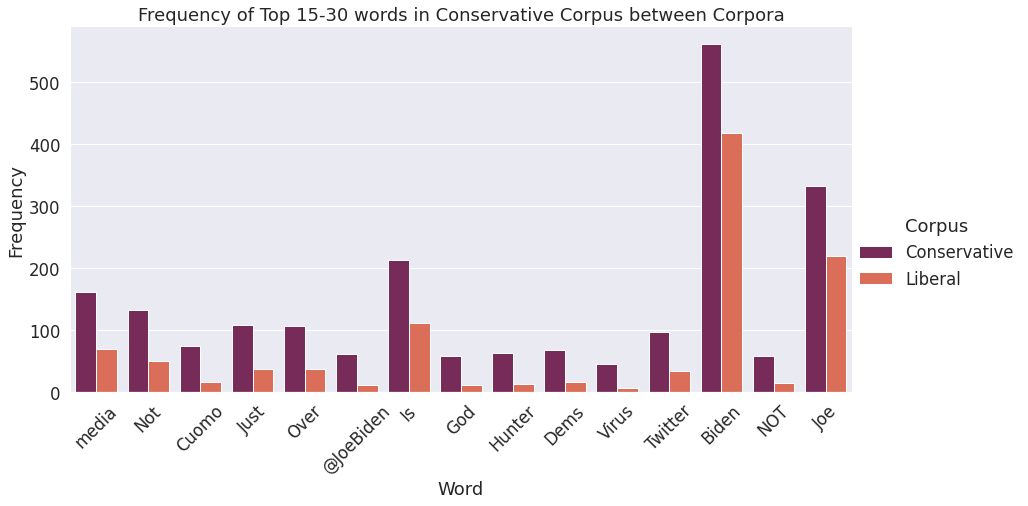

In [64]:
## graphing the raw frequencies of the top 30 words for Liberal Corpus between Corpora
sns.set(font_scale = 1.5)
sns.color_palette("rocket", as_cmap=True)
sns.catplot(x="item", y="Frequency", hue="Corpus", data= keyness_two1, kind="bar", height=6, aspect=2, palette="rocket")
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.title("Frequency of Top 15-30 words in Conservative Corpus between Corpora")
plt.show();

### <center> Observations: One-Word Lists, Conservatives as Corpus A <center/>

* The first 15 words for the conservative corpus are not extremely revealing
    
* However, words 15-30 paint a clear picture. Words such as "media" or "Hunter" (as in Hunter Biden), reference to God, Democrats, and other politicians like Biden and Cuomo are relevant words to the conservative corpus more than the liberal corpus.
    
* Interestingly, conservatives are more likely to make references to politicians (particularly on the other side of the political spectrum)
    
* There is mention of the "virus" however little context does not help us to understand what is being discussed here. Interesting, the word "virus" is the only distinctively pandemic-related word here.

### <center> Bigram Lists, Liberals as Corpus A <center/>

In [65]:
## bigram lists with Liberal Corpus as Corpus A
item_list=[]
freq_list=[]
ref_freq_list = []
keyness_list=[]
calculate_keyness2(lib_bigram_dist, con_bigram_dist, top=50)

WORD                     Corpus A Freq.Corpus B Freq.Keyness
the coronavirus          169       28        96.226
in the                   647       341       63.971
of the                   785       450       57.094
the pandemic             65        8         44.324
the first                109       35        31.754
more than                119       43        28.767
the Trump                59        13        26.683
a new                    97        33        25.889
Donald Trump             131       55        23.737
the US                   52        12        22.498
the latest               43        8         22.474
Trump administration     40        7         21.900
as the                   95        36        21.107
according to             75        25        20.662
in a                     197       102       20.635
public health            35        6         19.453
White House              108       46        18.965
the president            61        19        18.561
to 

In [66]:
## creating a dataframe of the values for the graph
keyness_one1 =pd.DataFrame()
keyness_one1["item"]=item_list
keyness_one1["freq"]=freq_list
keyness_one1["ref_freq"]=ref_freq_list
keyness_one1=keyness_one1[:15]
keyness_one2 =pd.DataFrame()
keyness_one2["item"]=item_list
keyness_one2["keyness"]=keyness_list

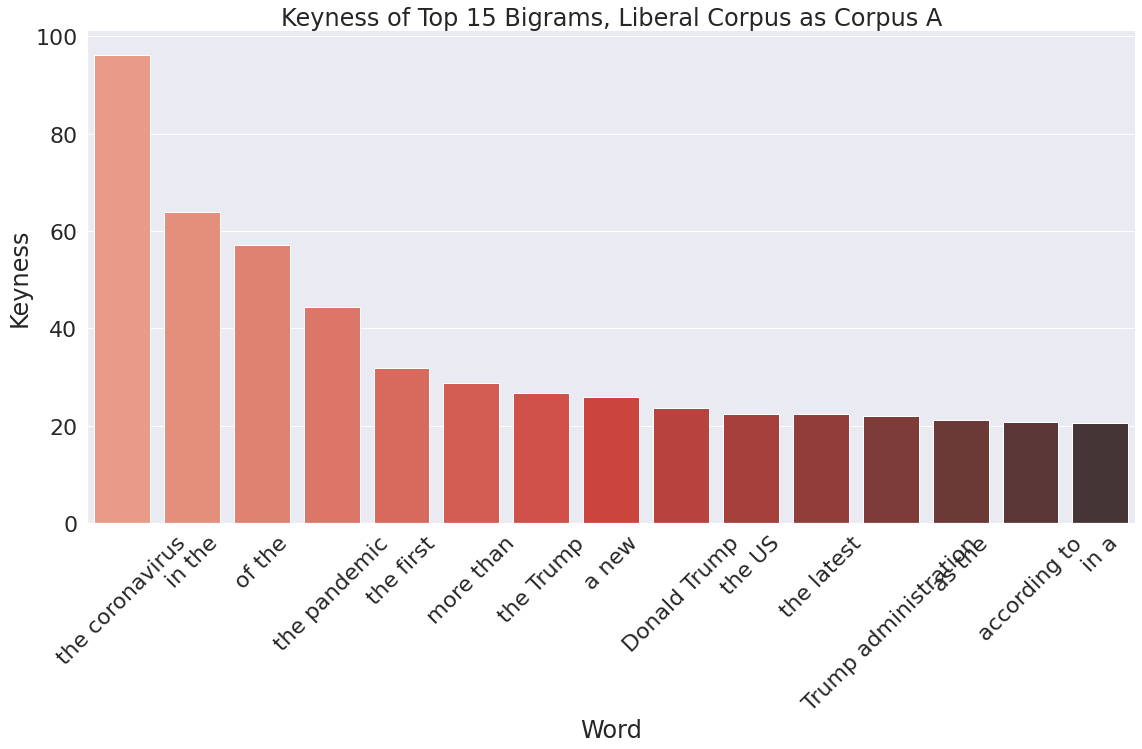

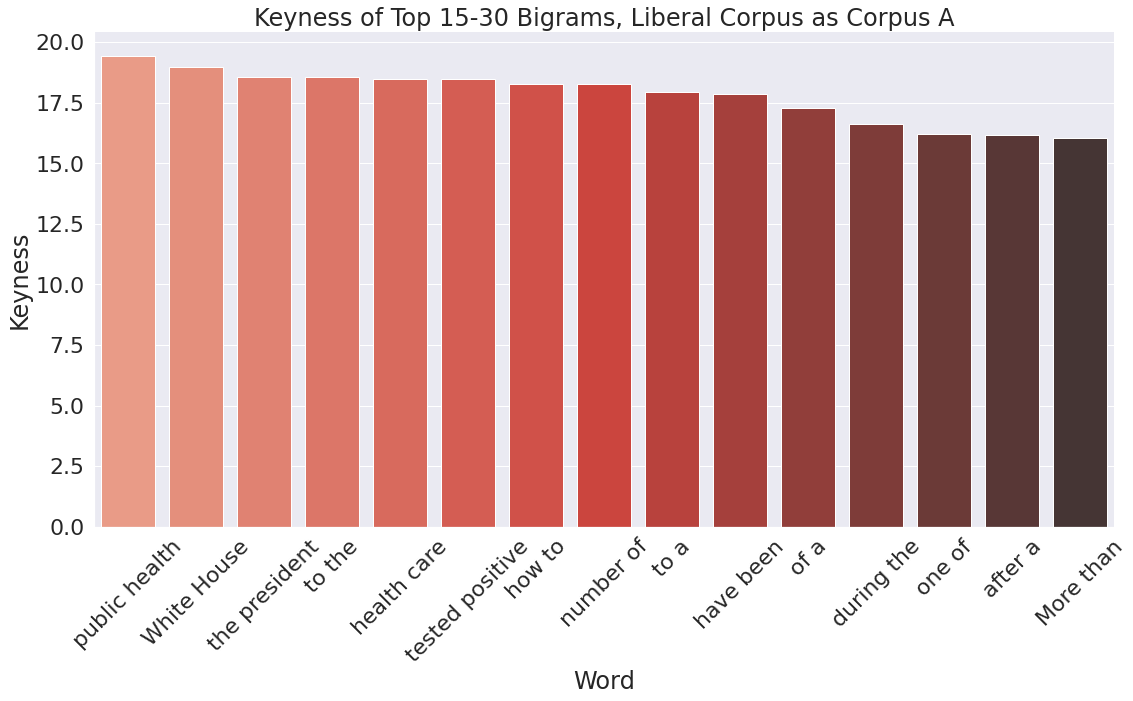

In [67]:
##plotting the keyness information
sns.set(font_scale =2)
chart=sns.catplot(x="item", y="keyness", data=keyness_one2[0:15], kind="bar", height=8, aspect=2, palette="Reds_d")
plt.title("Keyness of Top 15 Bigrams, Liberal Corpus as Corpus A")
plt.xlabel("Word")
plt.ylabel("Keyness")
plt.xticks(rotation=45)
plt.show();
sns.set(font_scale =2)
chart=sns.catplot(x="item", y="keyness", data=keyness_one2[15:30], kind="bar", height=8, aspect=2, palette="Reds_d")
plt.title("Keyness of Top 15-30 Bigrams, Liberal Corpus as Corpus A")
plt.xlabel("Word")
plt.ylabel("Keyness")
plt.xticks(rotation=45)
plt.show();

### <center> Observations: Bigram Lists, Liberals as Corpus A <center/>

* The bigram lists gives more context to some of the singular words we saw previously

* We are seeing words such as 'the pandemic", "the coronavirus" again
    
* However, other words such as "the president", "Donald Trump", "tested positive", "heath care", and "public health" give more context into the discussion.

* Liberals might be discussing how the administration is handling the pandemic, particularly in the context of the public health crisis

### <center> Bigram Lists, Conservatives as Corpus A <center/>

In [68]:
## bigram-word lists with Conservative Corpus as Corpus A
item_list=[]
freq_list=[]
ref_freq_list = []
keyness_list=[]
calculate_keyness2(con_bigram_dist, lib_bigram_dist, top=50)

WORD                     Corpus A Freq.Corpus B Freq.Keyness
you a                    292       6         388.801
the media                38        6         29.834
you are                  46        11        27.383
Joe Biden                200       131       23.679
I have                   57        22        20.416
if you                   66        29        19.445
They are                 28        7         16.065
you to                   31        9         15.505
I am                     58        27        15.482
Hunter Biden             29        8         15.239
but I                    32        10        14.832
the people               38        14        14.489
do not                   29        9         13.542
I just                   26        8         12.252
that you                 24        7         11.949
Ted Cruz                 24        7         11.949
This is                  122       85        11.678
on my                    23        7         10.964
Wh

In [69]:
## create a dataframe with keyness information
keyness_three1 =pd.DataFrame()
keyness_three1["item"]=item_list
keyness_three1["freq"]=freq_list
keyness_three1["ref_freq"]=ref_freq_list
keyness_three1=keyness_three1
keyness_three2 =pd.DataFrame()
keyness_three2["item"]=item_list
keyness_three2["keyness"]=keyness_list
keyness_three2=keyness_three2

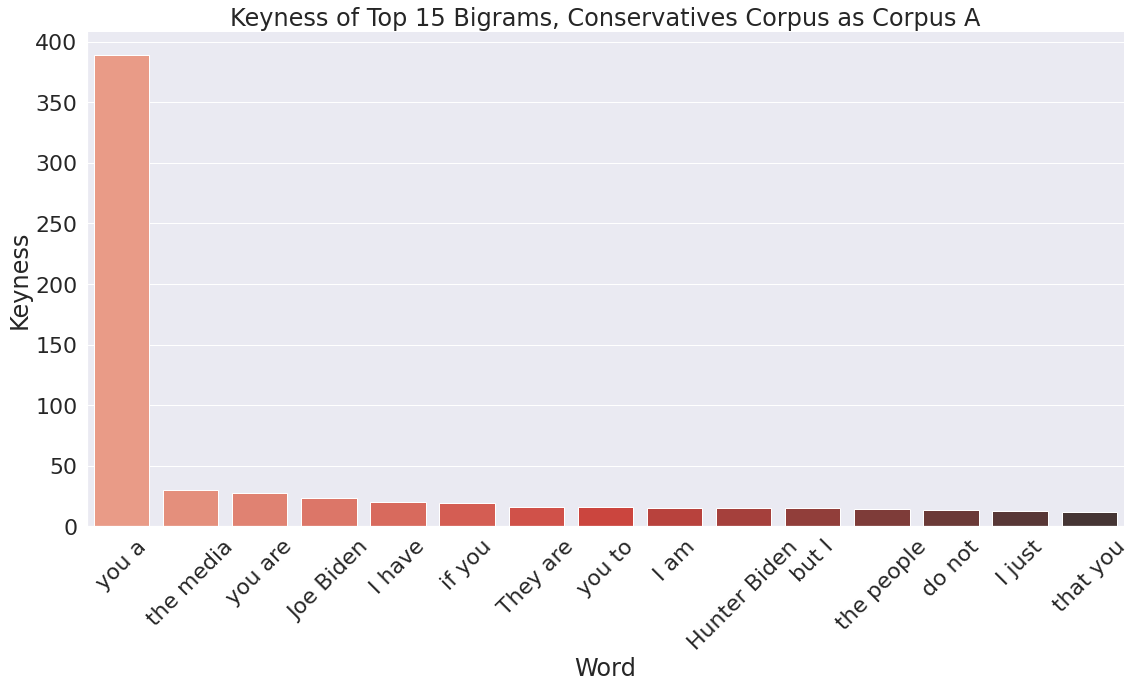

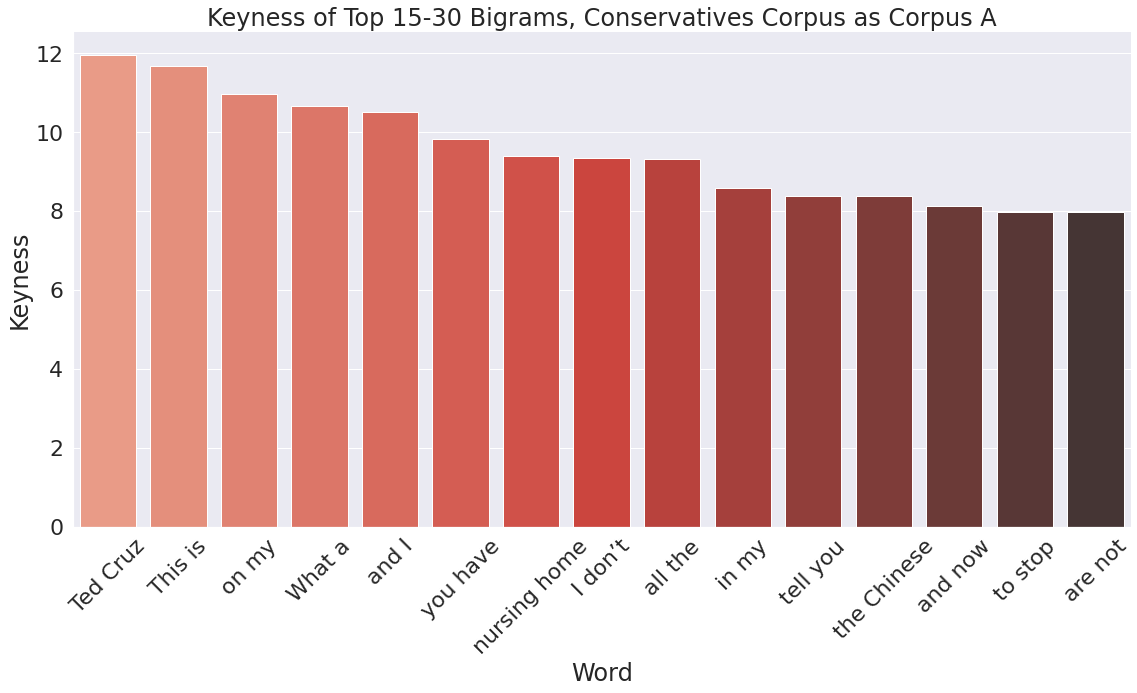

In [72]:
## plot the data
sns.set(font_scale =2)
chart=sns.catplot(x="item", y="keyness", data=keyness_three2[0:15], kind="bar", height=8, aspect=2, palette="Reds_d")
plt.title("Keyness of Top 15 Bigrams, Conservatives Corpus as Corpus A")
plt.xlabel("Word")
plt.ylabel("Keyness")
plt.xticks(rotation=45)
plt.show();
sns.set(font_scale =2)
chart=sns.catplot(x="item", y="keyness", data=keyness_three2[15:30], kind="bar", height=8, aspect=2, palette="Reds_d")
plt.title("Keyness of Top 15-30 Bigrams, Conservatives Corpus as Corpus A")
plt.xlabel("Word")
plt.ylabel("Keyness")
plt.xticks(rotation=45)
plt.show();

### <center> Observations: Bigram Lists, Conservatives as Corpus A <center/>

* The bigram lists gives more context to some of the singular words we saw previously

* We are seeing words such as "Joe Biden" and "Hunter Biden" which gives more context into the words from before
    
* However, other words such as "Ted Cruz", "nursing homes", and "the Chinese" are a unique look into what conservatives are discussing.

* Conservatives might be more likely to blame China for the virus (hence "the Chinese") and are more likely to mention politicians like Joe Biden, Hunter Biden, and Ted Cruz 

### <center> Trigram Lists, Liberals as Corpus A <center/>

In [75]:
## trigram word lists with Liberal Corpus as Corpus A
item_list=[]
freq_list=[]
ref_freq_list = []
keyness_list=[]
calculate_keyness2(lib_trigram_dist, con_trigram_dist, top=100)

WORD                     Corpus A Freq.Corpus B Freq.Keyness
tested positive for      32        6         16.623
the United States        31        9         10.365
one of the               49        20        9.423
the White House          45        19        8.055


In [76]:
## create a dataframe with keyness information
keyness_one1 =pd.DataFrame()
keyness_one1["item"]=item_list
keyness_one1["freq"]=freq_list
keyness_one1["ref_freq"]=ref_freq_list
keyness_one1=keyness_one1
keyness_one2 =pd.DataFrame()
keyness_one2["item"]=item_list
keyness_one2["keyness"]=keyness_list
keyness_one2=keyness_one2

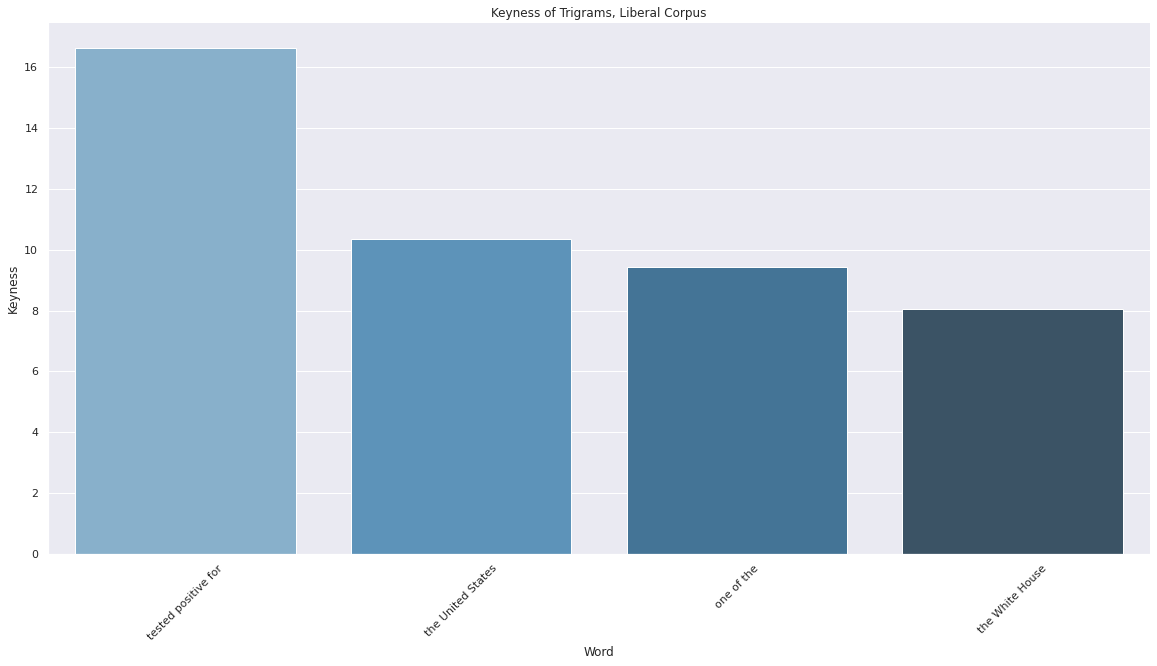

In [77]:
##create graph to display keyness
sns.set(font_scale =1)
chart=sns.catplot(x="item", y="keyness", data=keyness_one2, kind="bar", height=8, aspect=2, palette="Blues_d")
plt.title("Keyness of Trigrams, Liberal Corpus")
plt.xlabel("Word")
plt.ylabel("Keyness")
plt.xticks(rotation=45)
plt.show();

### <center> Observations: Trigram Lists, Liberals as Corpus A <center/>

* Ultimately trigram lists are not incredibly revealing here since there are not that many of them 

* Interesting to note, "tested positive for" is the top trigram, which is a pandemic-specific concept, whereas the others are not
    
* This helps contextualize liberals as being much more likely to discuss these topics than conservatives 

# <center> Keyness Analysis: Conclusion </center>


<center> <img src="images/convoPic.jpg" width="600" height="400"> </center>

* While mask-related words are not specific to liberals or conservatives, vaccines are discussed far more among liberals than conservatives, as are economy-related words like jobs, unemployment, etc.

* This finding negates my first hypothesis about conservatives being more likely to discuss the economy

* Ultimately, conservatives are more likely to discuss other politicians and the media, more than they discuss the pandemic or have pandemic-related discussion 

* Liberals are more likely to discuss health related topics like the vaccine, however masks are not distinctive to either corpus.

* An overall keyness analysis of one word lists of the liberal corpus shows that liberals are more likely to discuss health related topics overall, even though they do not discuss masks that much more, this confirms my second hypothesis (mostly!)